In [17]:
# Set the working directory.
import os
import pandas as pd
import seaborn as sns
os.getcwd()
os.chdir('C:\\Users\\Admin\\Downloads\\New folder')

In [6]:
file = pd.read_csv("train.csv")

In [8]:
file.shape

(891, 12)

In [11]:
file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
# Check for missing/null values.
file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

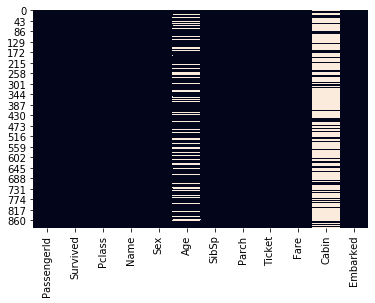

In [19]:
sns.heatmap(file.isnull(), cbar=False)

In [20]:
file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


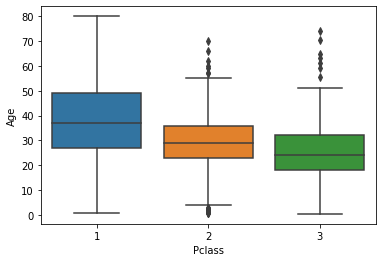

In [22]:
ax = sns.boxplot(x="Pclass", y="Age", data=file)

In [ ]:
def impute_age(cols):
    Age = cols[0]    
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age,axis=1)

In [243]:
# Now check, if there is any more null values to be handled. ideally, there should be no null values, left.
file.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [244]:
# Convert 'Sex' variable into binary value variable - Sex_male(1, if male : else 0). Then drop 'Sex' field
file['Sex_male'] = np.where(file['Sex'] == 'male', 1, 0)
file.drop('Sex', axis=1, inplace=True)
file.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [245]:
# Create a dummy variables for 'Pclass' field, as it's a categorical variable. Then drop one of them, including 'Pclass'
# field from the file.
dummy_class = pd.get_dummies(file['Pclass'], prefix='class')
file = file.join(dummy_class.drop("class_1", axis=1))
file.drop('Pclass', axis=1, inplace=True)
file.head()

,Survived,Age,SibSp,Parch,Sex_male,class_2,class_3
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,1,0,1


In [246]:
# Now split the data into training and test data. Take a backup of independent variables in training dataset,
# so that it's used, later.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(file.drop('Survived', axis=1), file['Survived'], test_size=0.2, 
                                                    random_state=152)
X_train1 = X_train



In [247]:
#Create a model summary, with respect to independent fields that are available in the dataset.
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
result = sm.GLM(Y_train, X_train, family  = sm.families.Binomial()).fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -315.46
Date:                Mon, 19 Aug 2019   Deviance:                       630.92
Time:                        11:04:49   Pearson chi2:                     738.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1172      0.353      8.843      0.0

C:\Users\Admin\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [248]:
#Create an advanced model summary, with respect to dataset.
print(result.summary2())
# Please note that AIC is 644.91. 
# With 5% of significance level, probability of Parch field is beyond 0.05 and hence not significant to the model.

               Results: Generalized linear model
Model:              GLM              AIC:            644.9176  
Link Function:      logit            BIC:            -3999.5774
Dependent Variable: Survived         Log-Likelihood: -315.46   
Date:               2019-08-19 11:04 LL-Null:        -468.40   
No. Observations:   712              Deviance:       630.92    
Df Model:           6                Pearson chi2:   738.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       3.1172    0.3525    8.8428  0.0000   2.4263   3.8081
Age        -0.0158    0.0061   -2.5881  0.0097  -0.0278  -0.0038
SibSp      -0.3659    0.1253   -2.9212  0.0035  -0.6114  -0.1204
Parch      -0.0448    0.1197   -0.3739  0.7085  -

In [249]:
# Remove Parch field from training dataset.
X_train.drop('Parch', axis=1, inplace=True)

# Remove Parch field from test dataset.
X_test.drop('Parch', axis=1, inplace=True)



In [250]:
# Now Remodel the dataset and see if the model has improved.
result2 = sm.GLM(Y_train, X_train, family  = sm.families.Binomial()).fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -315.53
Date:                Mon, 19 Aug 2019   Deviance:                       631.06
Time:                        11:05:06   Pearson chi2:                     738.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1006      0.349      8.872      0.0

In [251]:
print(result2.summary2())
# Please note that AIC is turned out to 643.05.
# AIC got decreased from 644.9 to 643.05. Hence the model has considerably improved.

               Results: Generalized linear model
Model:              GLM              AIC:            643.0581  
Link Function:      logit            BIC:            -4006.0049
Dependent Variable: Survived         Log-Likelihood: -315.53   
Date:               2019-08-19 11:05 LL-Null:        -468.40   
No. Observations:   712              Deviance:       631.06    
Df Model:           5                Pearson chi2:   738.      
Df Residuals:       706              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       3.1006    0.3495    8.8724  0.0000   2.4157   3.7856
Age        -0.0160    0.0061   -2.6180  0.0088  -0.0279  -0.0040
SibSp      -0.3793    0.1203   -3.1525  0.0016  -0.6152  -0.1435
Sex_male   -2.6922    0.2168  -12.4199  0.0000  -

In [252]:
# Remove Parch field from training backup dataset.
X_train1.drop('Parch', axis=1, inplace=True)



In [253]:
#Calculate Area under the ROC curve and also plot the ROC curve
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train1, Y_train)
new_prediction = logit.predict(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
probs = logit.predict_proba(X_test)[::,1]
auc = roc_auc_score(Y_test, probs)
print(auc)

0.828030303030303


C:\Users\Admin\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [257]:
#import visualization package for plotting ROC curve, using fpr(false positive rate), Tpr(True positive rate).
fpr,tpr, threshold = roc_curve(Y_test, probs)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

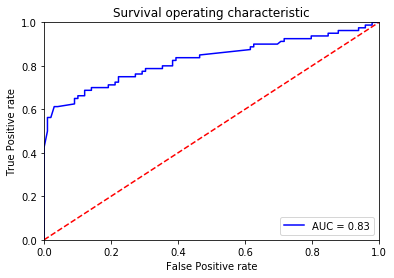

In [233]:
#Draw a visualization graph, to identify ROC Curve.
plt.title('Survival operating characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' %auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], 'r--' )
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [255]:
# Calculate Optimal_threshold to compare with probability, later.
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = threshold[optimal_idx]
optimal_threshold

0.5530158858211798

In [256]:
# Let's use this new optimal threshold and update our predictions.
# and Create confusion_matrix as well.
new_prediction = np.where(probs>optimal_threshold,1, 0)
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Y_test, new_prediction)
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg', 'Actual pos'], columns=['Predicted neg', 'Predicted pos'])
confusion_df

,Predicted neg,Predicted pos
Actual neg,97,2
Actual pos,35,45
